In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer as Tfidf
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
%matplotlib inline

/Users/nishaswarup/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_json('json_2015.json')

In [3]:
data.head()

,business_id,cool,date,funny,stars,text,useful,user_id
0,vT12uXtdBQ10_lUcl-M40w,0,2015-01-01,0,1,terrible experience....I am a local first of a...,0,C_xtIn19eKivN335dzjadg
1,aWMxTWSEqBvH2KhdGPLibQ,0,2015-01-01,0,3,Bad service at this location.\n\nGood iced cof...,0,T7J9ae0wTskrI_Bgwp-4cA
2,Z98h1BhssZeFfZvcVTYOpw,0,2015-01-01,0,2,We have been to Maya's many times since it fir...,1,O7WaUuYwX45Ia6Mvf01UCw
3,3rwM9fPYPk9qDkEBOhyHbg,1,2015-01-01,0,5,"booked the hotel for new years, over the phone...",1,kq-4vbC1cHQbRKyDmwERSA
4,JpYn_HdxQNZQSlWWv4P6Iw,0,2015-01-01,0,3,"Good, not great. Not a ton of tea options but ...",1,XweddetOpWNuJQ5mLb_5JQ


In [4]:
samp = data.sample(50000) #draw samples

(array([  6.26337000e+05,   2.01100000e+04,   1.17740000e+04,
          2.41300000e+03,   2.57600000e+03,   7.56000000e+02,
          9.47000000e+02,   2.98000000e+02,   3.98000000e+02,
          2.80000000e+02]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

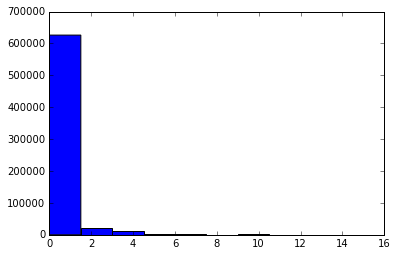

In [17]:
plt.hist(data['funny'], range=[0, 15])
plt.x_label('Number of Funny Votes')
plt.y_label('Frequency')

(array([ 74917.,  27981.,   6316.,   2576.,   1308.,    693.,    398.,
           280.,    191.,    176.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

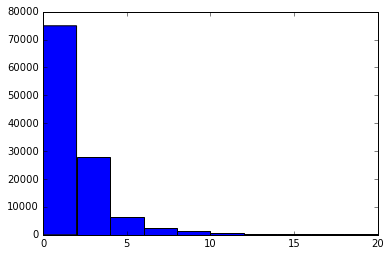

In [16]:
plt.hist(data['funny'].iloc[data['funny'].nonzero()[0]], range=[0, 15])
plt.x_label('Number of Funny Votes')
plt.y_label('Frequency')

In [21]:
print 'Number of ratings for which there were 0 funny votes: ', len(data['funny']) - len(data['funny'].iloc[data['funny'].nonzero()[0]])

Number of ratings for which there were 0 funny votes:  551420


(array([ 557552.,   53363.,   34407.,    6252.,    6517.,    1813.,
           2396.,     771.,    1038.,     668.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

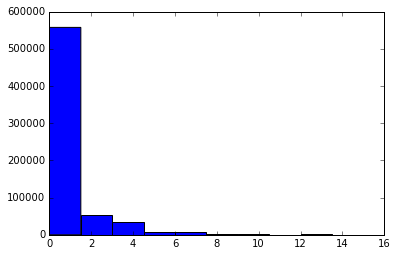

In [18]:
plt.hist(data['useful'], range=[0, 15])

(array([ 142081.,   53363.,   34407.,    6252.,    6517.,    1813.,
           2396.,     771.,    1038.,     668.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

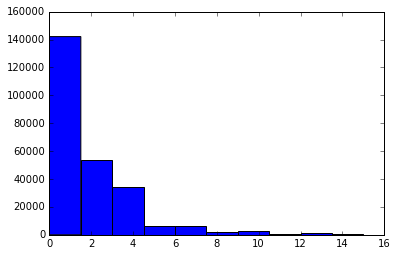

In [19]:
plt.hist(data['useful'].iloc[data['useful'].nonzero()[0]], range=[0, 15])

In [22]:
print 'Number of ratings for which there were 0 useful votes: ', len(data['useful']) - len(data['useful'].iloc[data['useful'].nonzero()[0]])

Number of ratings for which there were 0 useful votes:  415471
